In [ ]:
# Importing important libaries:-
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from nltk import word_tokenize,sent_tokenize,regexp_tokenize
pd.set_option('max_colwidth',100)
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import wordnet

from nltk.corpus import wordnet as wn
from nltk import FreqDist
import re
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Problem Statement:-
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

In [ ]:
df=pd.read_csv('maglinent train.csv')
# first 5 rows 
df.head()

In [ ]:
df_test=pd.read_csv('maglinenet test.csv')
df_test.head(5) # first 5 test data.

# Explotary data analysis 

In [ ]:
# checking null values
df.isnull().sum()

In [9]:
# Detail information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
# All columns in dataset
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

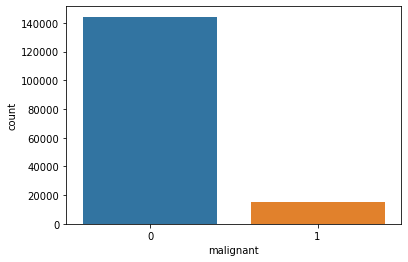

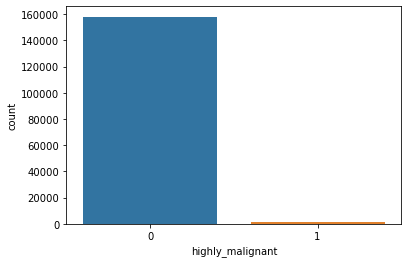

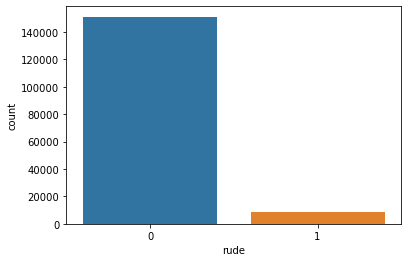

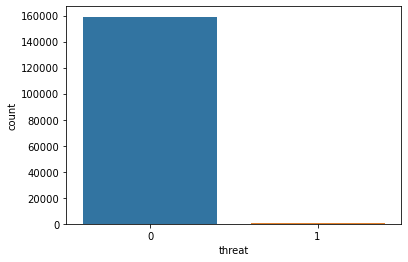

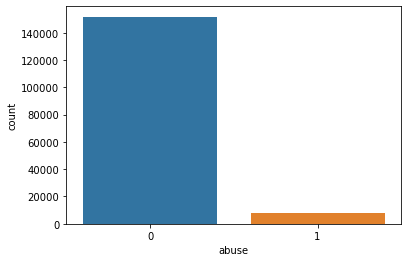

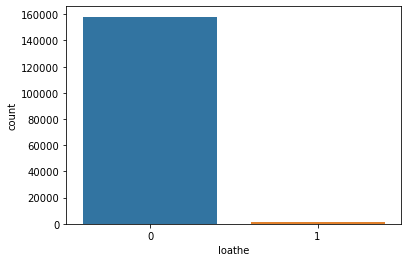

In [11]:
col=df.columns[2:]
for i in col:
    sb.countplot(df[i])
    plt.show()

In [12]:
for i in col:
    print(df[i].value_counts(),'\n')
    

0    144277
1     15294
Name: malignant, dtype: int64 

0    157976
1      1595
Name: highly_malignant, dtype: int64 

0    151122
1      8449
Name: rude, dtype: int64 

0    159093
1       478
Name: threat, dtype: int64 

0    151694
1      7877
Name: abuse, dtype: int64 

0    158166
1      1405
Name: loathe, dtype: int64 



In [13]:
counts=df[col].iloc[:,0:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

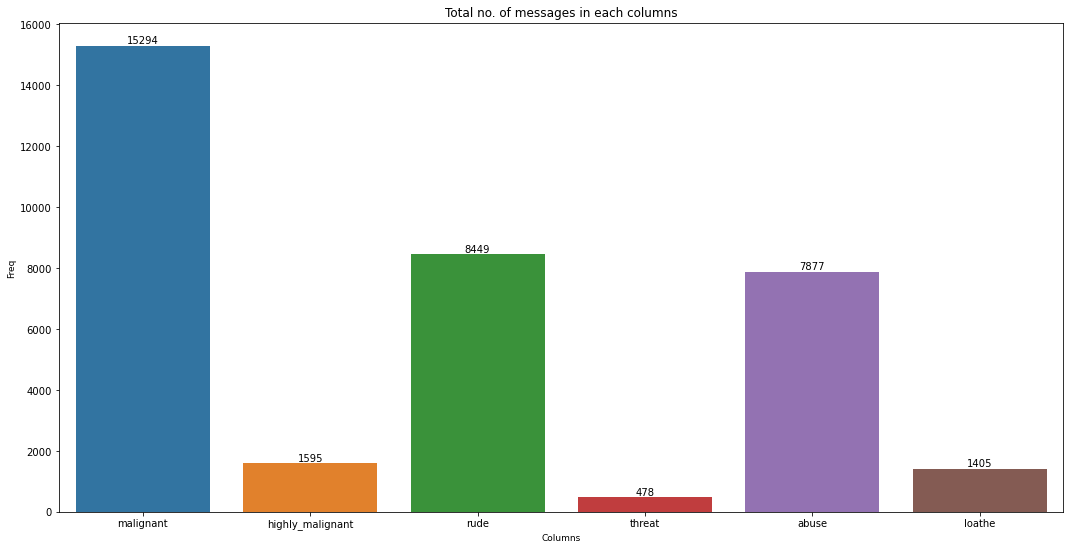

In [14]:
plt.figure(figsize=(18,9))
ax=sb.barplot(counts.index,counts.values)
plt.title("Total no. of messages in each columns")
plt.ylabel('Freq', fontsize=9)
plt.xlabel('Columns',fontsize=9)
rects=ax.patches
labels=counts.values

for rect, label in zip(rects, labels):
    height=rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',va='bottom' )
plt.show()

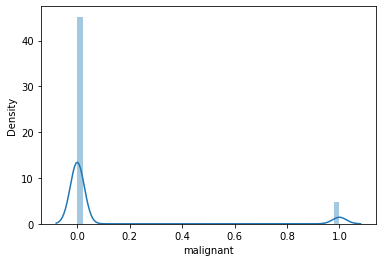

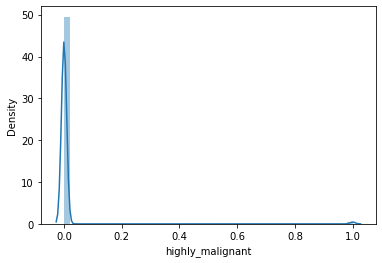

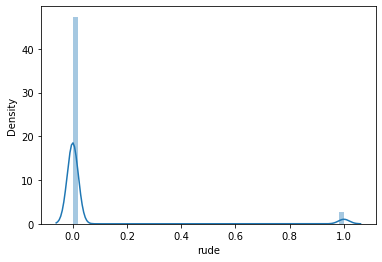

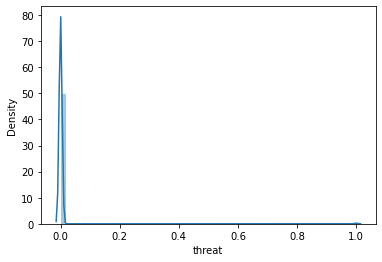

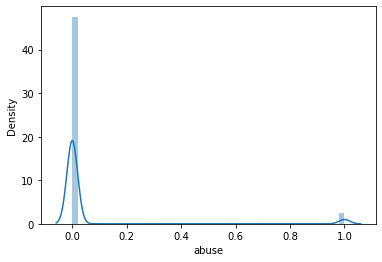

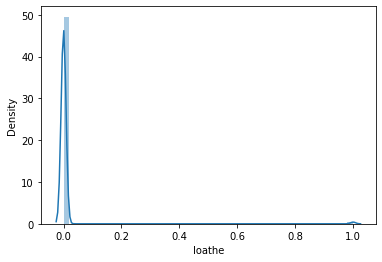

In [15]:
for i in df[col].describe().columns:
    sb.distplot(df[col][i])
    plt.show()
    

In [16]:
# Describe the function 
df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Correlation :- 
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

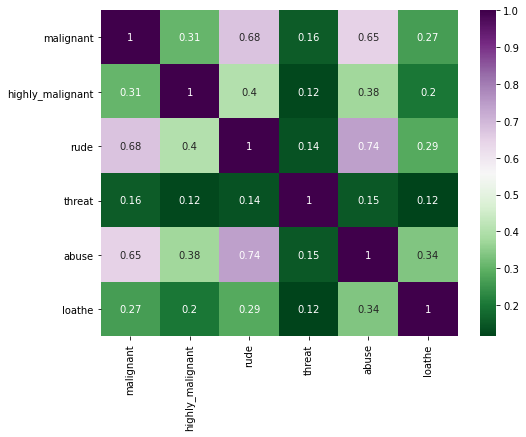

In [18]:
plt.figure(figsize=(8,6))
sb.heatmap(df.corr(),annot=True,cmap='PRGn_r')

# Data preprocessing

In [19]:
# these are used as labels here:-
c_label= ['malignant','highly_malignant','rude','threat','abuse','loathe']
df[c_label].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [20]:
df['label']=df[c_label].sum(axis=1)

In [21]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,0


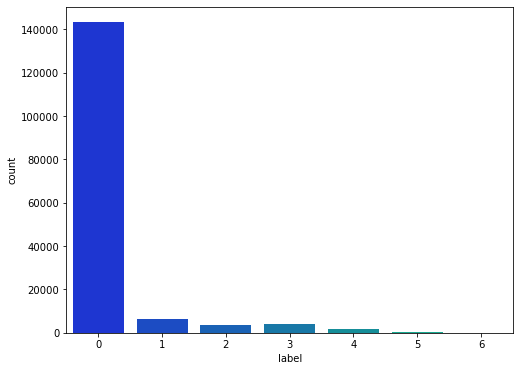

In [22]:
plt.figure(figsize=(8,6))
sb.countplot(df['label'],palette='winter')
plt.show()

In [23]:
df['before_clean']=df['comment_text'].map(lambda comment_text: len(comment_text))
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,before_clean
0,0000997932d777bf,Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They wer...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, Januar...",0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relev...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in r...",0,0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61....,0,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted no...,0,0,0,0,0,0,0,116


In [24]:
df_test['before_clean']=df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,before_clean
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofu...,367
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO.",50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """,54
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can on...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing but too-long-crap",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n Does it get there faster by throwing to cut off m...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I see your changes and agree this is """"more correct....",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the EU - Germany - has a Law of Return quite similar ...",502


# Text Preprocessing

In [25]:
stop_words=stopwords.words('english')
lemmatizer=wordnet.WordNetLemmatizer()


# lets clean the messages and remove or replace some words
def edited(text):
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    text= re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    # lets remove '\n' in comment_text
    text= re.sub(r'\n',' ',text)
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [26]:
df['comment_text'] = df['comment_text'].apply(edited)


In [27]:
df['comment_text'][0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'

In [90]:
# cleaning test data :-
df_test['comment_text']=df_test['comment_text'].apply(edited)

In [29]:
df_test['after_clean']=df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,before_clean,after_clean
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating sad mofuckas bitch slap ur pethedic white face get ...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct form guess source updated shall update information ...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut man direct fielder fielder mickey mantle era bett...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree correct gotten confused found acknowledging japan terri...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quite similar israel actually true germany allows peop...,502,319


In [30]:
df['len_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,before_clean,len_after_cleaning
0,0000997932d777bf,explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new ...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck thanks talk january utc,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly removing relevant information talking edits instea...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered section statistic later subsection type accident think...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time asking view completely contradicts coverage reliable source anyone care feel even gi...,0,0,0,0,0,0,0,295,178
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ring crunch captain,0,0,0,0,0,0,0,81,65
159569,fff125370e4aaaf3,look like actually put speedy first version deleted look,0,0,0,0,0,0,0,116,56


In [31]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
def wcloud(df, label):
    
    # lets print only rows where the label value is 1 (ie. where comment is harsh)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="yellow",max_words=4500)

    wc.generate(" ".join(text))

    plt.figure(figsize=(27,27))
    plt.subplot(221)
    
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=18)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

In [33]:
df_m=df.loc[:,['comment_text','malignant']]

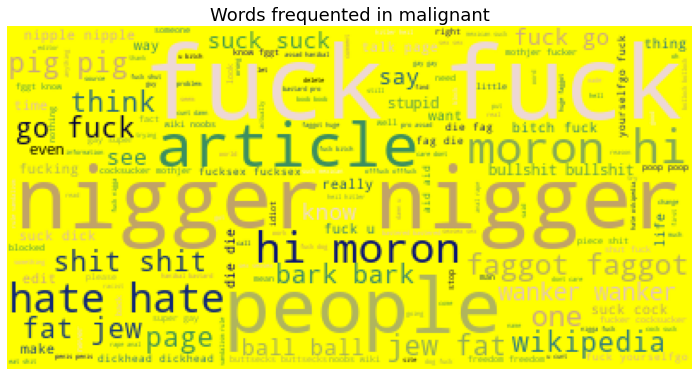

In [34]:
wcloud(df_m,'malignant')

In [35]:
df_hm=df.loc[:,['comment_text','highly_malignant']]

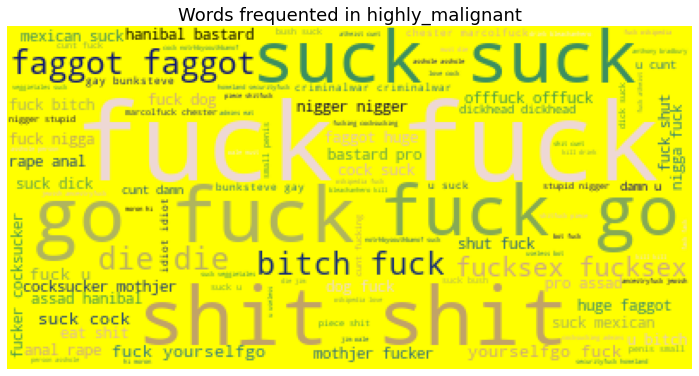

In [36]:
wcloud(df_hm,'highly_malignant')

In [37]:
df_r=df.loc[:,['comment_text','rude']]

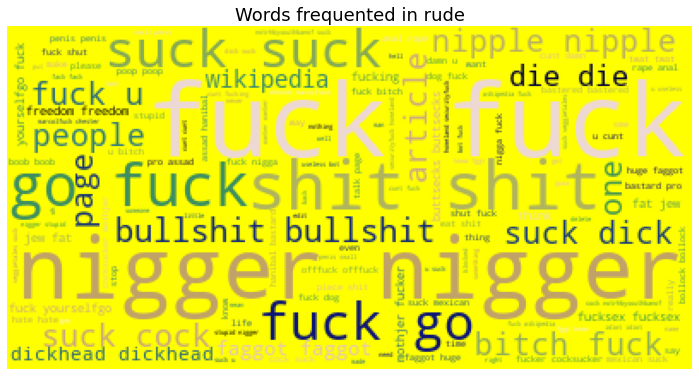

In [38]:
wcloud(df_r,'rude')

In [39]:
df_a=df.loc[:,['comment_text','abuse']]

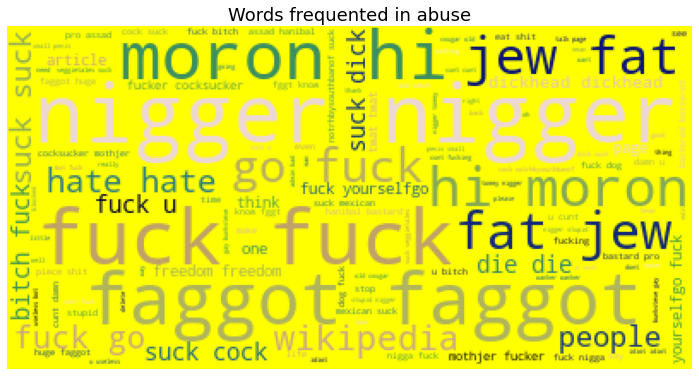

In [40]:
wcloud(df_a,'abuse')

In [41]:
df_t=df.loc[:,['comment_text','threat']]

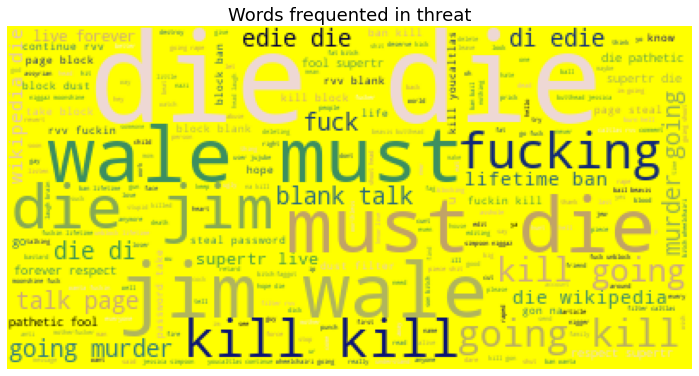

In [42]:
wcloud(df_t,'threat')

In [43]:
df_l=df.loc[:,['comment_text','loathe']]

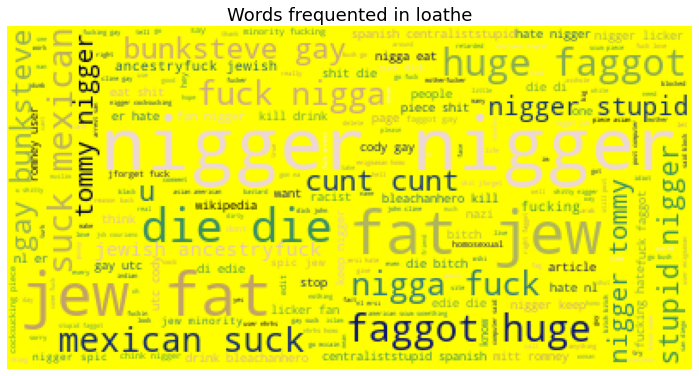

In [44]:
wcloud(df_l,'loathe')

# Vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')

In [46]:
X = tfidf.fit_transform(df['comment_text'])

In [47]:
y=df['label']

In [48]:
print(X.shape,'\t\t',y.shape)

(159571, 14000) 		 (159571,)


In [92]:
test_vec = tfidf.fit_transform(df_test['comment_text'])

In [93]:
test_vec.shape

(153164, 14000)

# Model building

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=42, stratify=y)

In [52]:
print(x_train.shape,'\t\t',x_test.shape)

(108508, 14000) 		 (51063, 14000)


In [53]:
print(y_train.shape,'\t',y_test.shape)

(108508,) 	 (51063,)


# Model selection 

In [59]:
#Importing required libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [60]:
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
rf = RandomForestClassifier()

In [61]:
def print_score(y_pred,clf):
    print('classifier:',clf)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [62]:
for classifier in [svc,lr,mnb,sgd,lgb,rf]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC()
Jaccard score: 0.8475983717774762
Accuracy score: 0.9175136595969684
f1_score: 0.9175136595969684
Precision :  0.9175136595969684
Recall: 0.9175136595969684
Hamming loss:  0.08248634040303154
Confusion matrix:
  [[[ 3023  2169]
  [  273 45598]]

 [[48363   665]
  [ 1668   367]]

 [[49611   338]
  [  974   140]]

 [[48938   778]
  [  719   628]]

 [[50270   230]
  [  453   110]]

 [[50911    29]
  [  115     8]]

 [[51050     3]
  [   10     0]]]

classifier: LogisticRegression()
Jaccard score: 0.8445949607152533
Accuracy score: 0.915751130955878
f1_score: 0.915751130955878
Precision :  0.915751130955878
Recall: 0.915751130955878
Hamming loss:  0.08424886904412196
Confusion matrix:
  [[[ 2246  2946]
  [  100 45771]]

 [[48563   465]
  [ 1796   239]]

 [[49795   154]
  [ 1051    63]]

 [[49077   639]
  [  710   637]]

 [[50407    93]
  [  513    50]]

 [[50935     5]
  [  122     1]]

 [[51053     0]
  [   10     0]]]

classifier: MultinomialNB()
Jaccard score: 0.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [63]:
data={'model':['linearSVC','logistic','multinomial','sdg','LGBM'],
  'acc_score':[0.9174940759454008,0.9174940759454008,0.9091122730744374,0.9112273074437459,0.9147327810743592],
     'Jaccard score': [0.8475649468123598,0.8444283908253567,0.8333692373976734,0.8367985611510791,0.8428641030730643],
     'f1_score':[0.9174940759454008,0.9156532126980397,0.9156532126980397,0.9111489728374753,0.9111489728374753],
     }

In [64]:
scores=pd.DataFrame(data)
scores

,model,acc_score,Jaccard score,f1_score
0,linearSVC,0.917494,0.847565,0.917494
1,logistic,0.917494,0.844428,0.915653
2,multinomial,0.909112,0.833369,0.915653
3,sdg,0.911227,0.836799,0.911149
4,LGBM,0.914733,0.842864,0.911149


so, here we see that all the score where linearSVC has heighest 

In [65]:
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [66]:
from sklearn.model_selection import GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv =2, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=-1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [67]:
 GCV.best_params_

{'estimator__C': 2,
 'estimator__dual': False,
 'estimator__intercept_scaling': 2,
 'estimator__loss': 'squared_hinge',
 'estimator__multi_class': 'crammer_singer',
 'estimator__penalty': 'l1'}

In [73]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='squared_hinge',multi_class='crammer_singer', penalty ='l1',intercept_scaling=2))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [74]:
print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.846863301806608
Accuracy score: 0.9170828192624797
f1_score: 0.9170828192624797
Precision :  0.9170828192624797
Recall: 0.9170828192624797
Hamming loss:  0.08291718073752032

Confusion matrix: 
 [[[ 3057  2135]
  [  310 45561]]

 [[48496   532]
  [ 1760   275]]

 [[49663   286]
  [  973   141]]

 [[48831   885]
  [  641   706]]

 [[50188   312]
  [  430   133]]

 [[50867    73]
  [  110    13]]

 [[51042    11]
  [   10     0]]]


In [96]:
prediction=model.predict(test_vec)


In [99]:
len(prediction)


153164

# saving the model 

In [107]:
import joblib
filename='malignant prediction model'


In [108]:
joblib.dump(model,filename)

['malignant prediction model']